In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#With 15 generations
cmp_mean_res = pd.read_csv("../../mean15/SIMOUT.txt", sep="\t", header=0)
cmp_pw_res = pd.read_csv("../../speedtest/SIMOUT.txt", sep="\t", header=0)

#With random gamma
cmp_mean_res0 = pd.read_csv("../../mean_competition/SIMOUT.txt", sep="\t", header=0)
cmp_pw_res0 = pd.read_csv("../../pairwise0/SIMOUT.txt", sep="\t", header=0)

#Older version of pairwise (random gamma)
cmp_pw_old = pd.read_csv("../../pairwise_competition/SIMOUT.txt", sep="\t", header=0)
cmp_pw_no_apprx = pd.read_csv("../../pairwise_no_apprx/SIMOUT.txt", sep="\t", header=0)

#Neutral VS Pairwise VS mean 20 gen
cmp_pw = pd.read_csv("../../pairwise_20gen/SIMOUT.txt", sep="\t", header=0)
cmp_neutral = pd.read_csv("../../neutral/SIMOUT.txt", sep="\t", header=0)
cmp_mean = pd.read_csv("../../mean_20gen/SIMOUT.txt", sep="\t", header=0)

# Sumstats start at "S" which is index 21, e.g. cmp_mean_res.iloc[:, 21:]
ss_start_idx = list(cmp_mean_res.columns).index("S")
ss_columns = cmp_mean_res.columns[21:]
cmp_pw_res


(200, 81)


In [39]:
ttvals, ttres = stats.ttest_ind(cmp_mean_res.iloc[:, 21:], cmp_pw_res.iloc[:, 21:])
ttres = multitest.multipletests(ttres,method='bonferroni')

ttvals2, ttres2 = stats.ttest_ind(cmp_mean_res0.iloc[:, 21:], cmp_pw_res0.iloc[:, 21:])
ttres2 = multitest.multipletests(ttres2,method='bonferroni')

ttvals_old, ttres_old = stats.ttest_ind(cmp_pw_old.iloc[:, 21:], cmp_pw_res0.iloc[:, 21:])
ttres_old = multitest.multipletests(ttres_old,method='bonferroni')

ttvals_apprx, ttres_apprx = stats.ttest_ind(cmp_pw_old.iloc[:, 21:], cmp_pw_no_apprx.iloc[:, 21:])
ttres_apprx = multitest.multipletests(ttres_apprx,method='bonferroni')

ttvals_neu, ttres_neu = stats.ttest_ind(cmp_pw.iloc[:, 21:], cmp_neutral.iloc[:, 21:])
ttres_neu = multitest.multipletests(ttres_neu,method='bonferroni')

#Should be corrected for multiple testing

/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


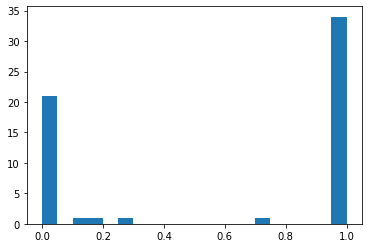

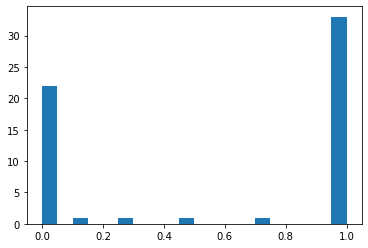

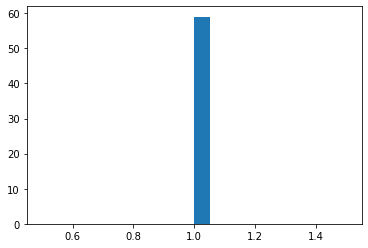

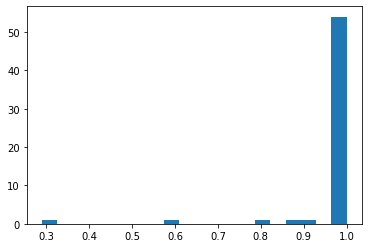

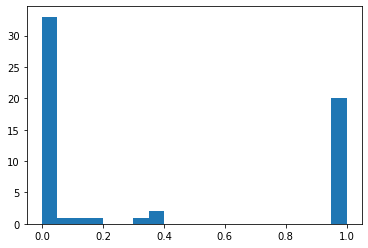

In [40]:
plt.hist(ttres[1], bins=20)
plt.show()
plt.hist(ttres2[1], bins=20)
plt.show()
plt.hist(ttres_old[1], bins=20)
plt.show()
plt.hist(ttres_apprx[1], bins=20)
plt.show()
plt.hist(ttres_neu[1], bins=20)
plt.show()

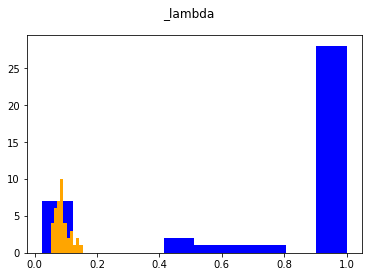

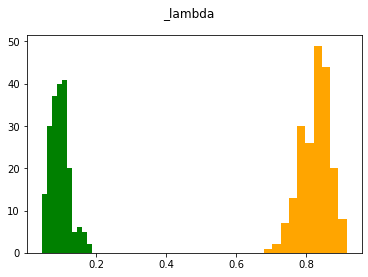

In [41]:
param = "_lambda"
plt.hist(cmp_mean_res[param], color='blue')
plt.hist(cmp_pw_res[param], color='orange')
plt.suptitle(param)
plt.show()
plt.hist(cmp_pw[param], color='orange')
plt.hist(cmp_neutral[param], color='green')
plt.suptitle(param)
plt.show()

66


<ipython-input-18-0bba107dbde0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


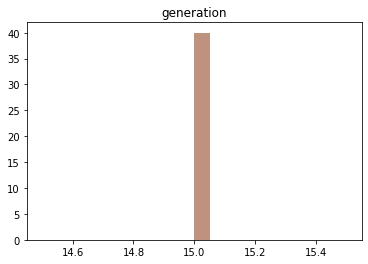

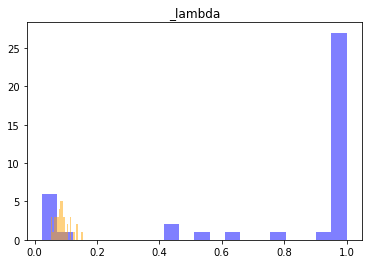

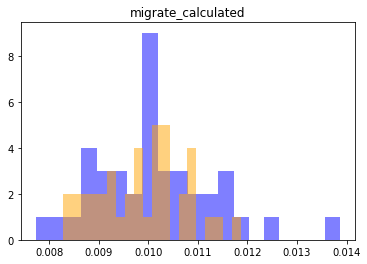

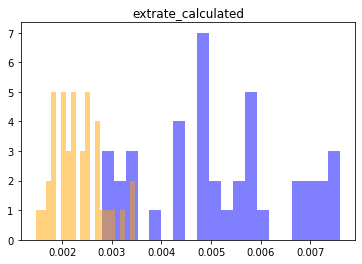

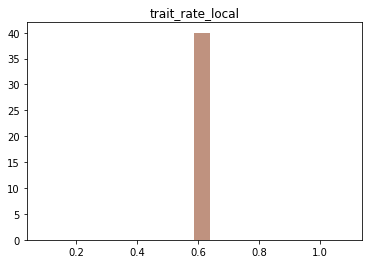

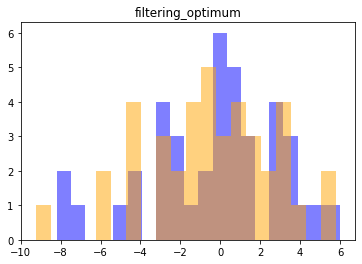

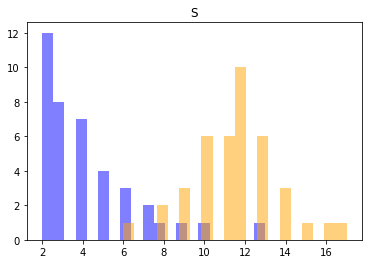

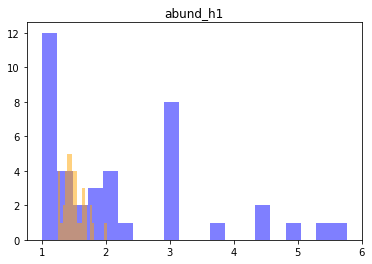

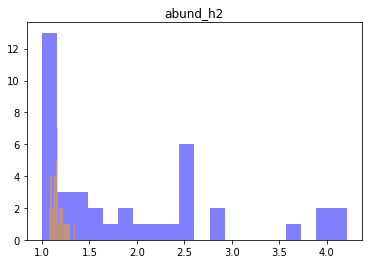

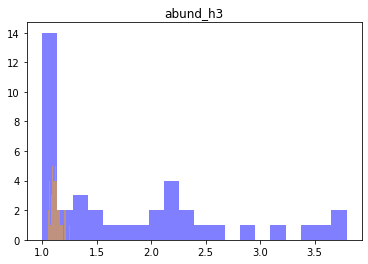

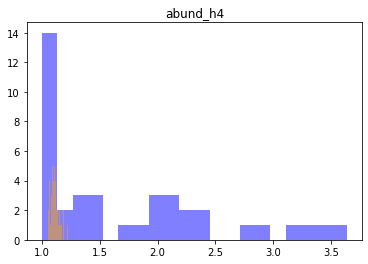

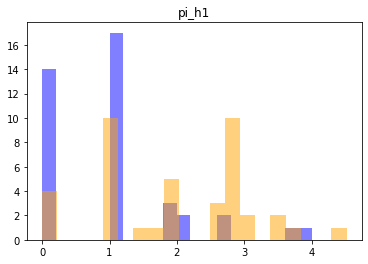

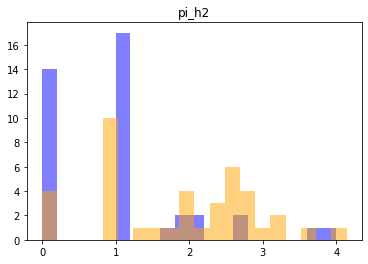

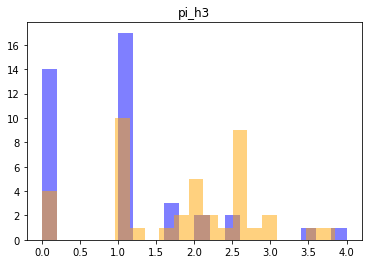

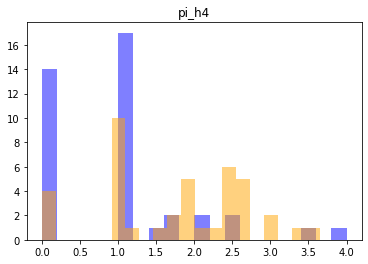

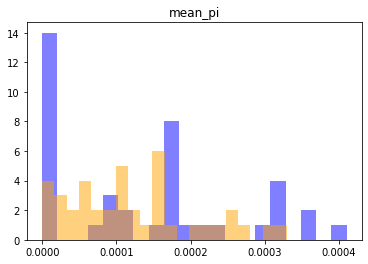

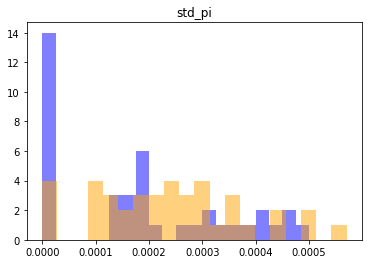

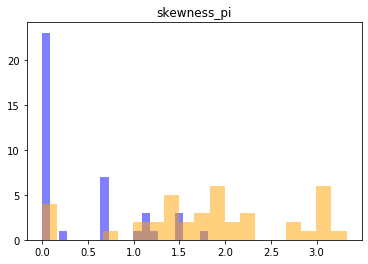

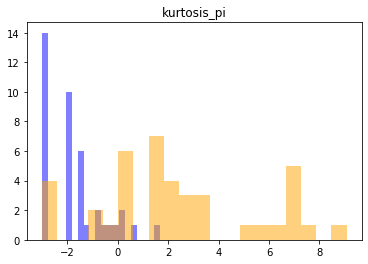

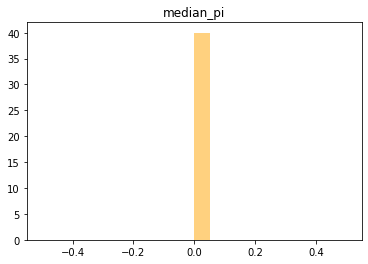

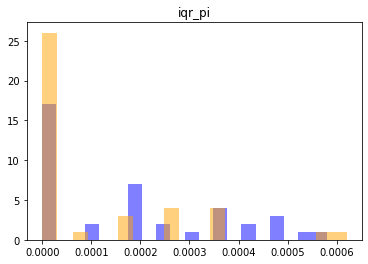

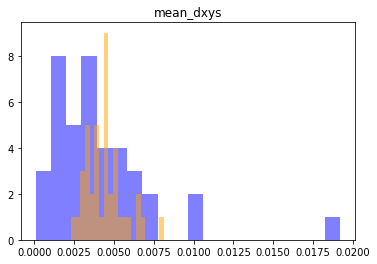

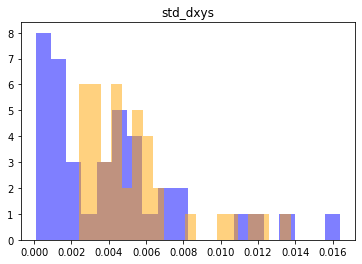

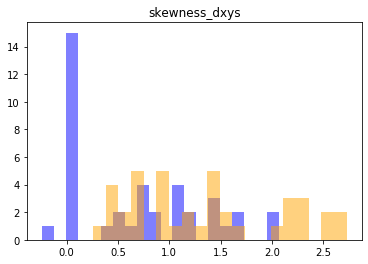

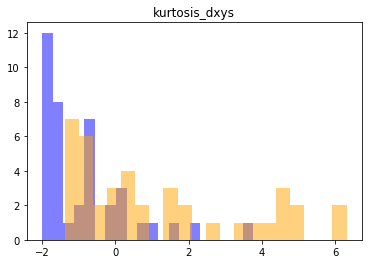

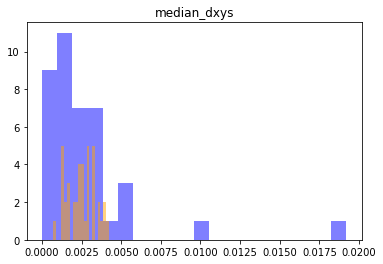

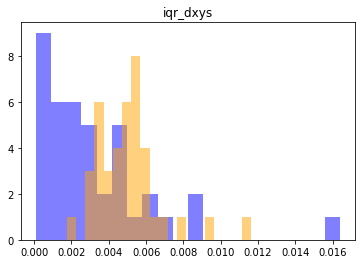

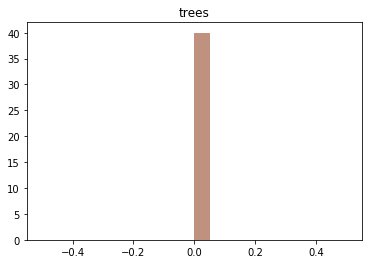

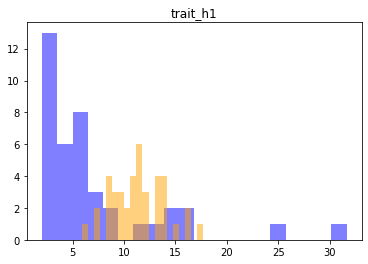

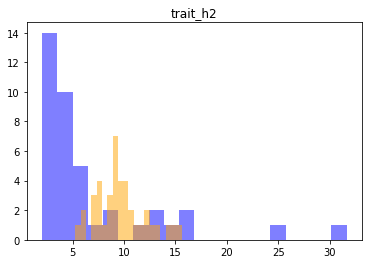

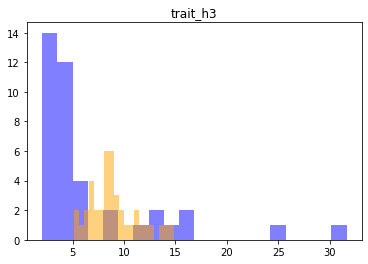

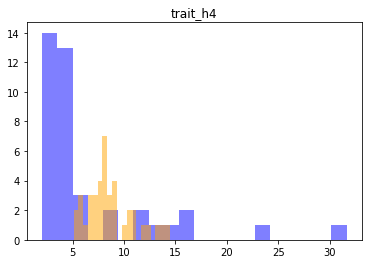

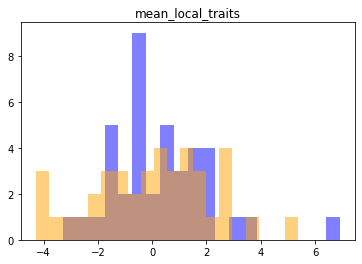

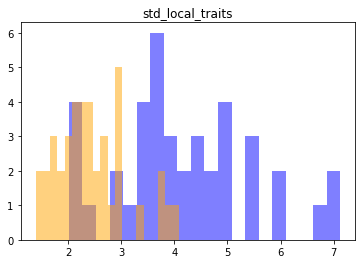

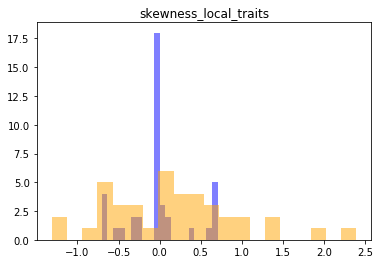

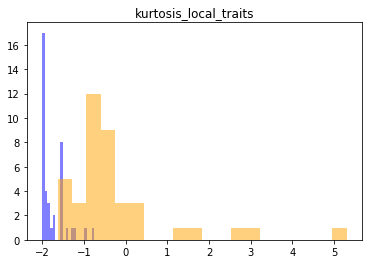

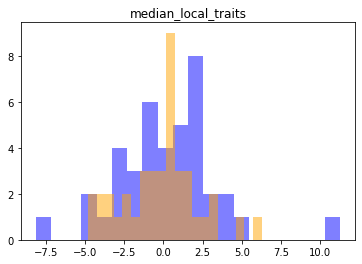

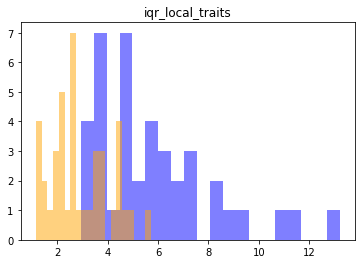

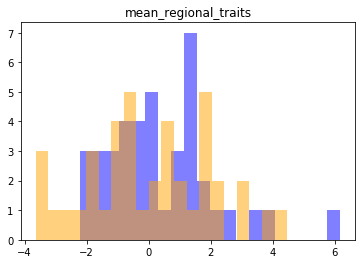

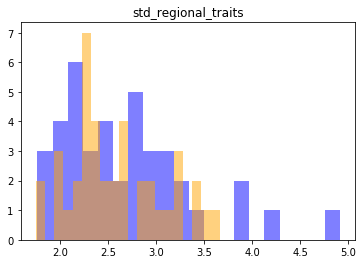

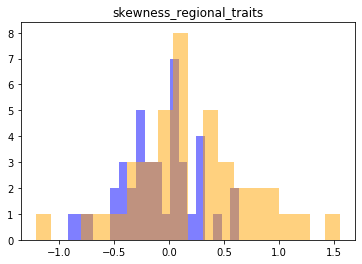

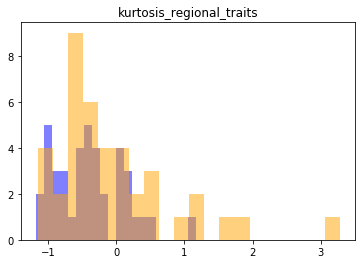

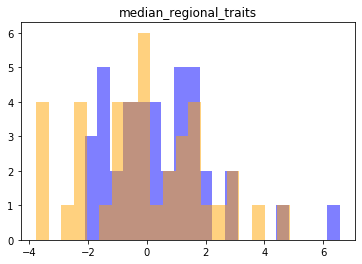

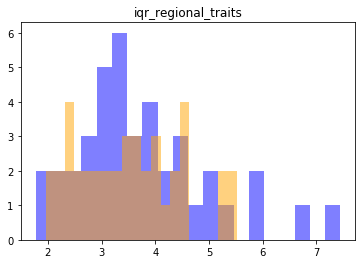

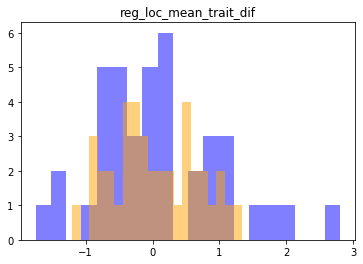

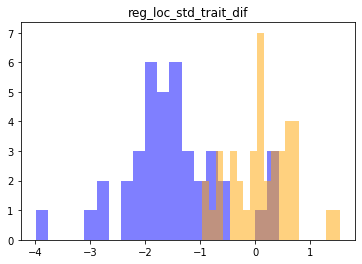

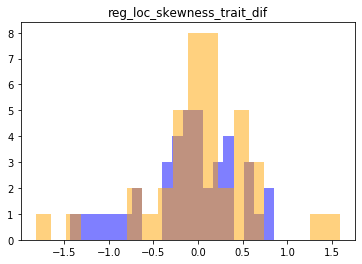

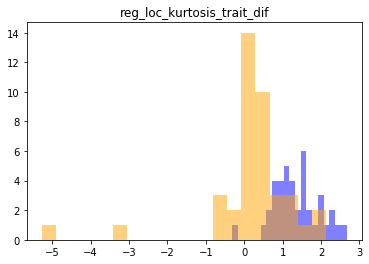

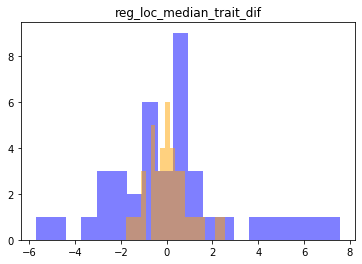

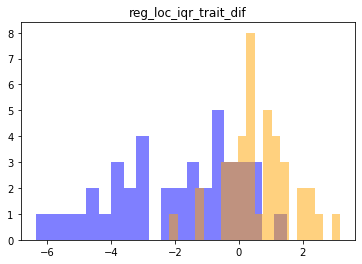

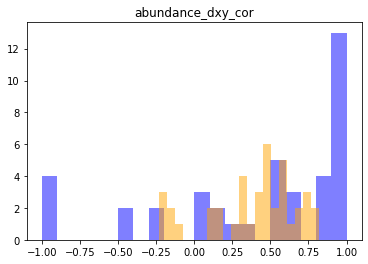

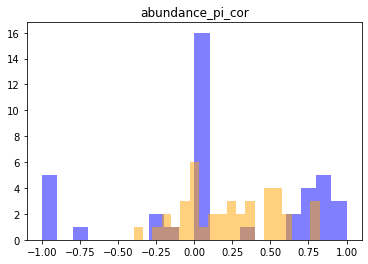

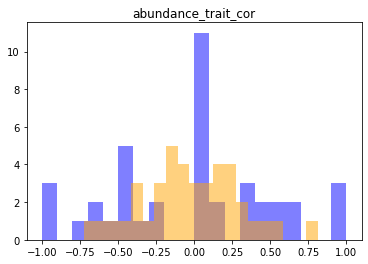

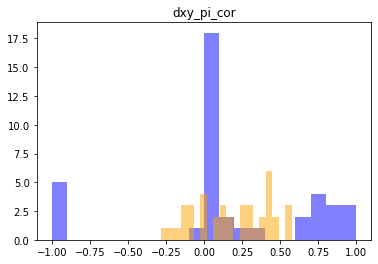

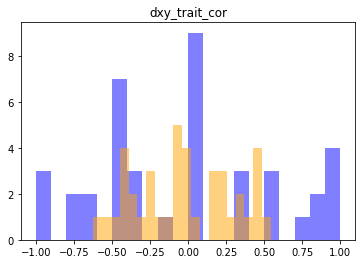

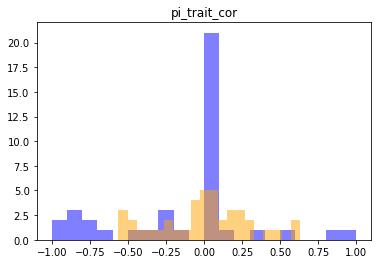

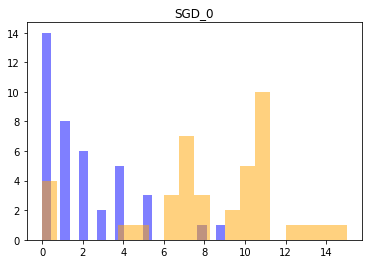

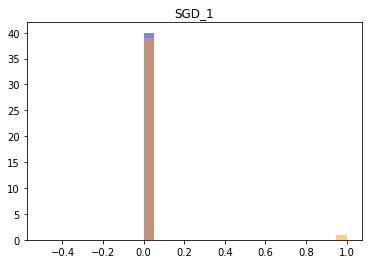

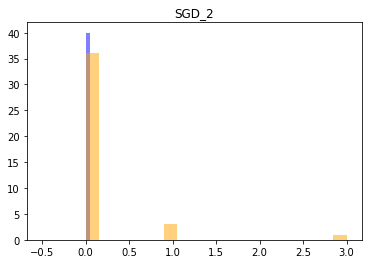

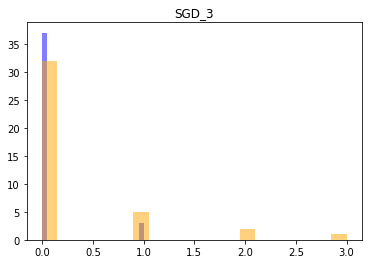

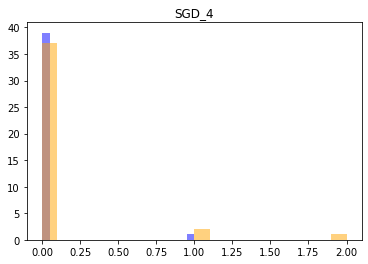

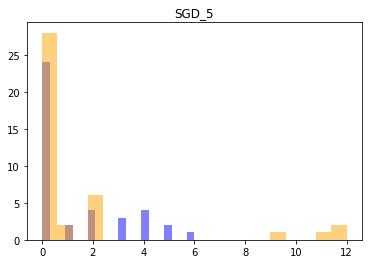

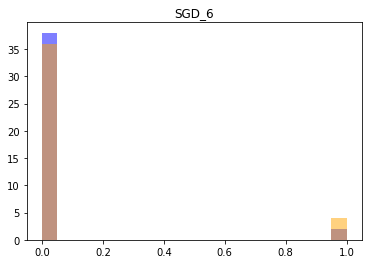

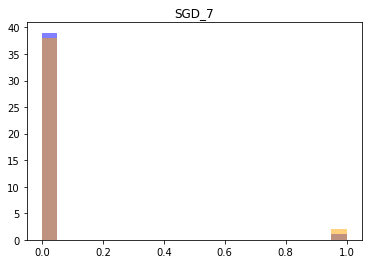

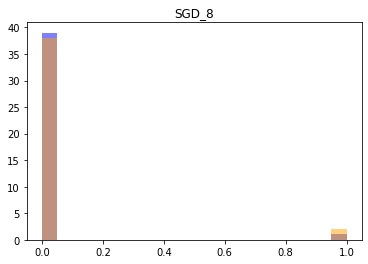

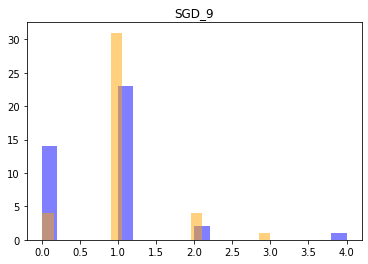

In [18]:
# How many sumstats?
print(len(cmp_mean_res.columns[15:]))
# Plot all the sumstats one at a time
for p in list(cmp_mean_res.columns)[15:]:
    fig, ax = plt.subplots()
    ax.hist(cmp_mean_res[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)

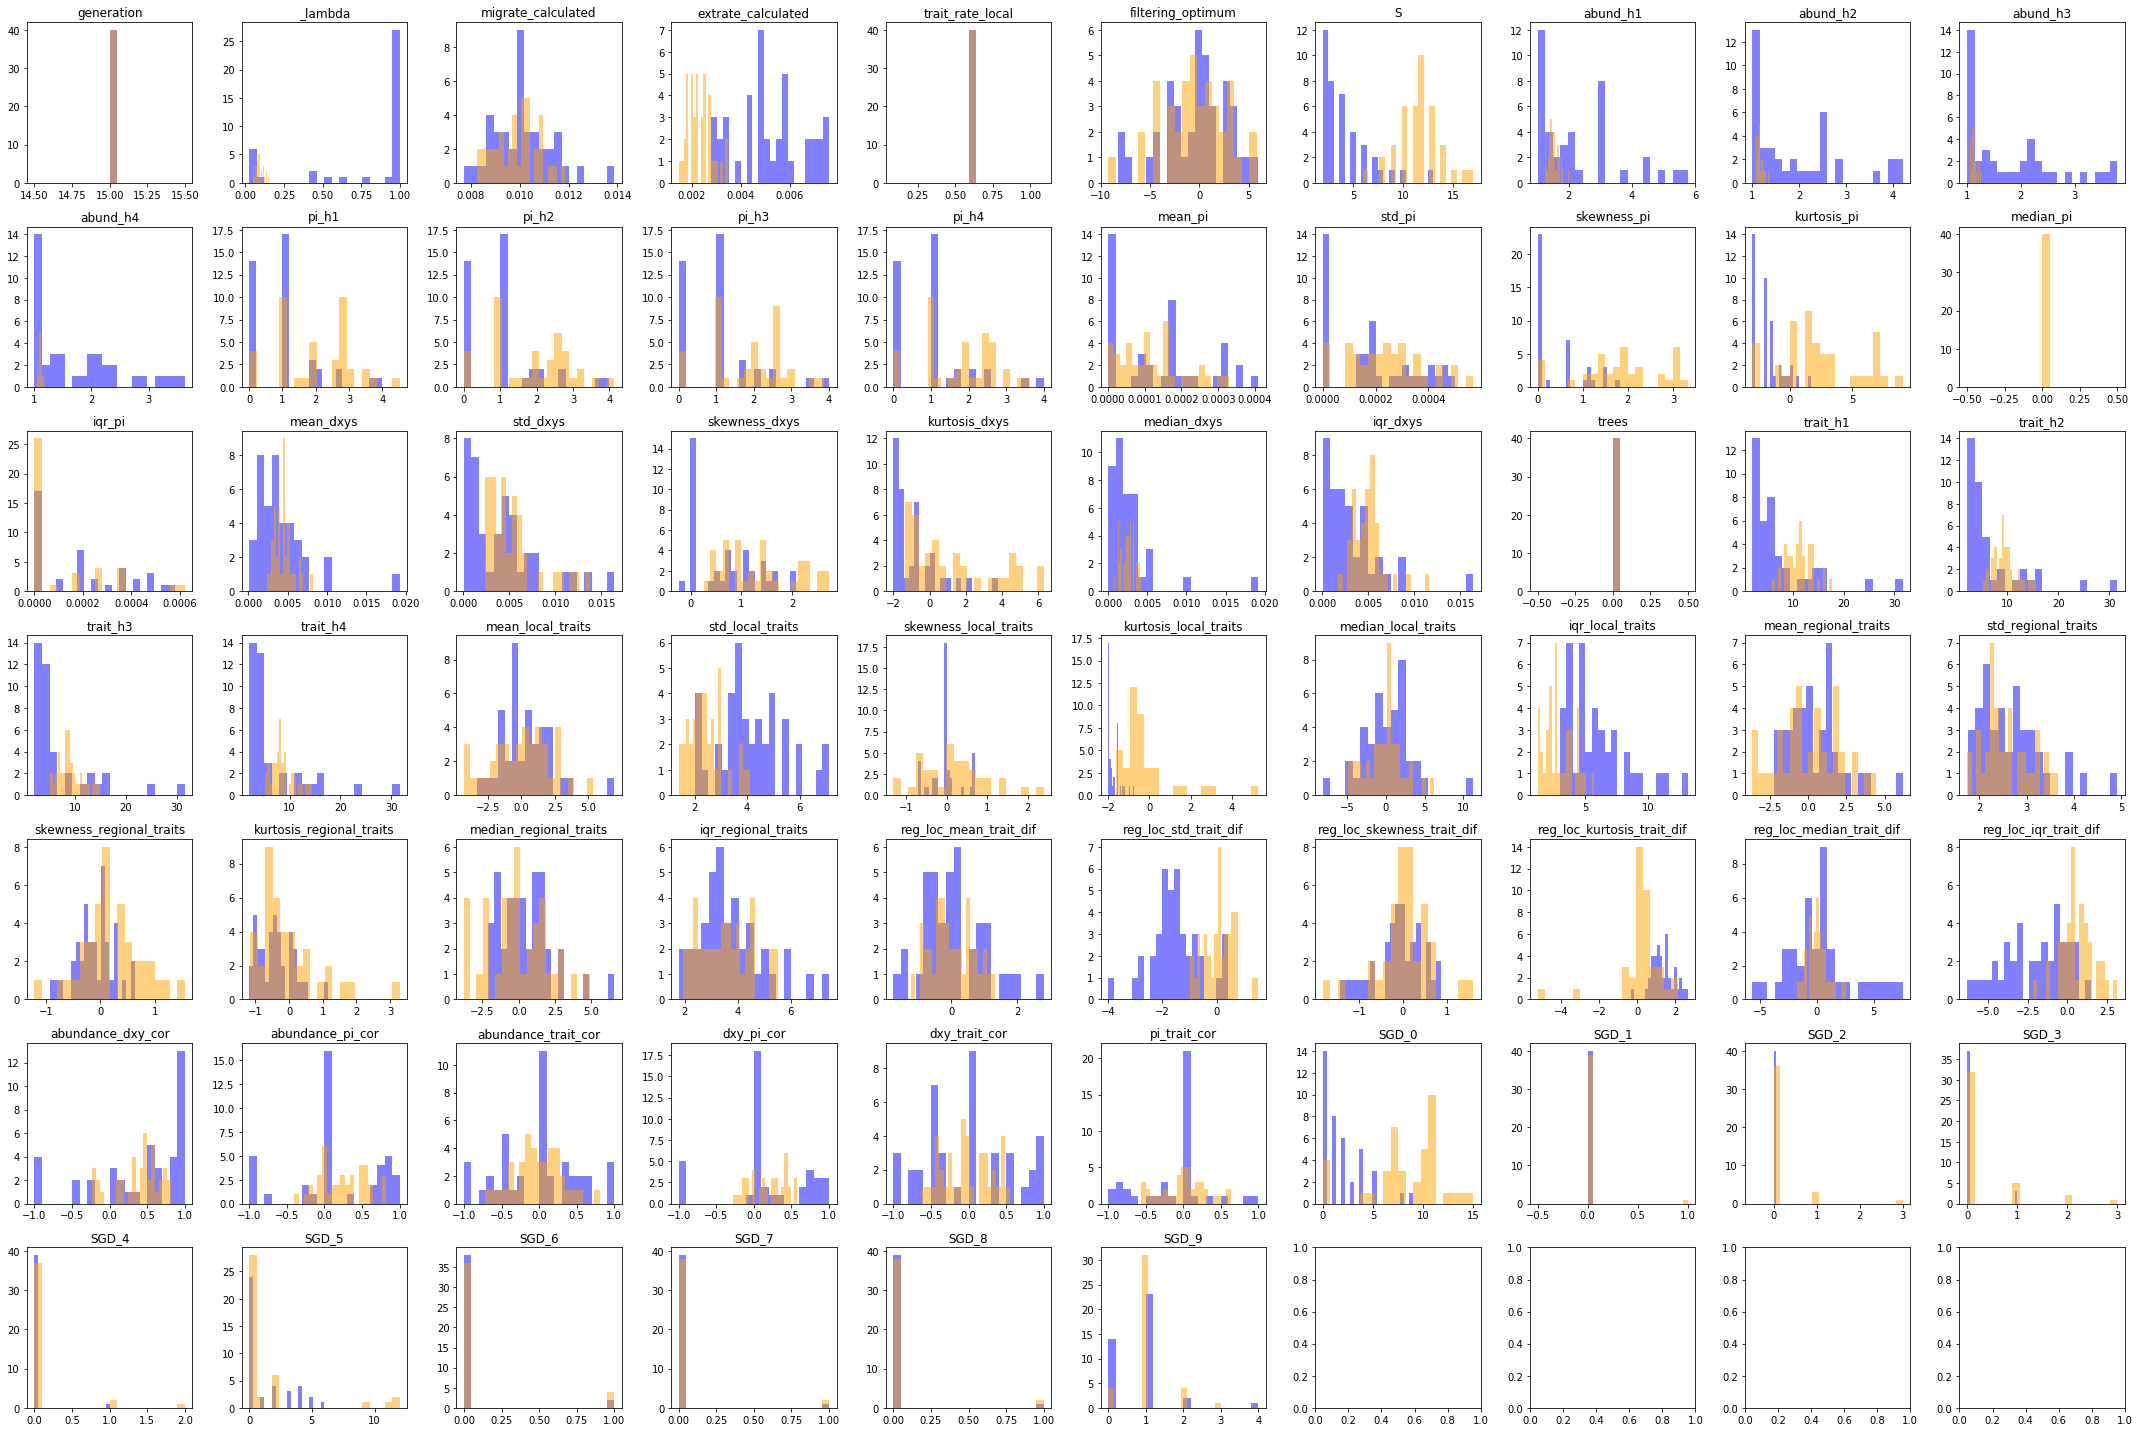

In [19]:
# This is annoying, so we can plot them in one giant figure
# Mean is blue
# pairwise is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(cmp_mean_res.columns)[15:], axs):
    ax.hist(cmp_mean_res[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw_res[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

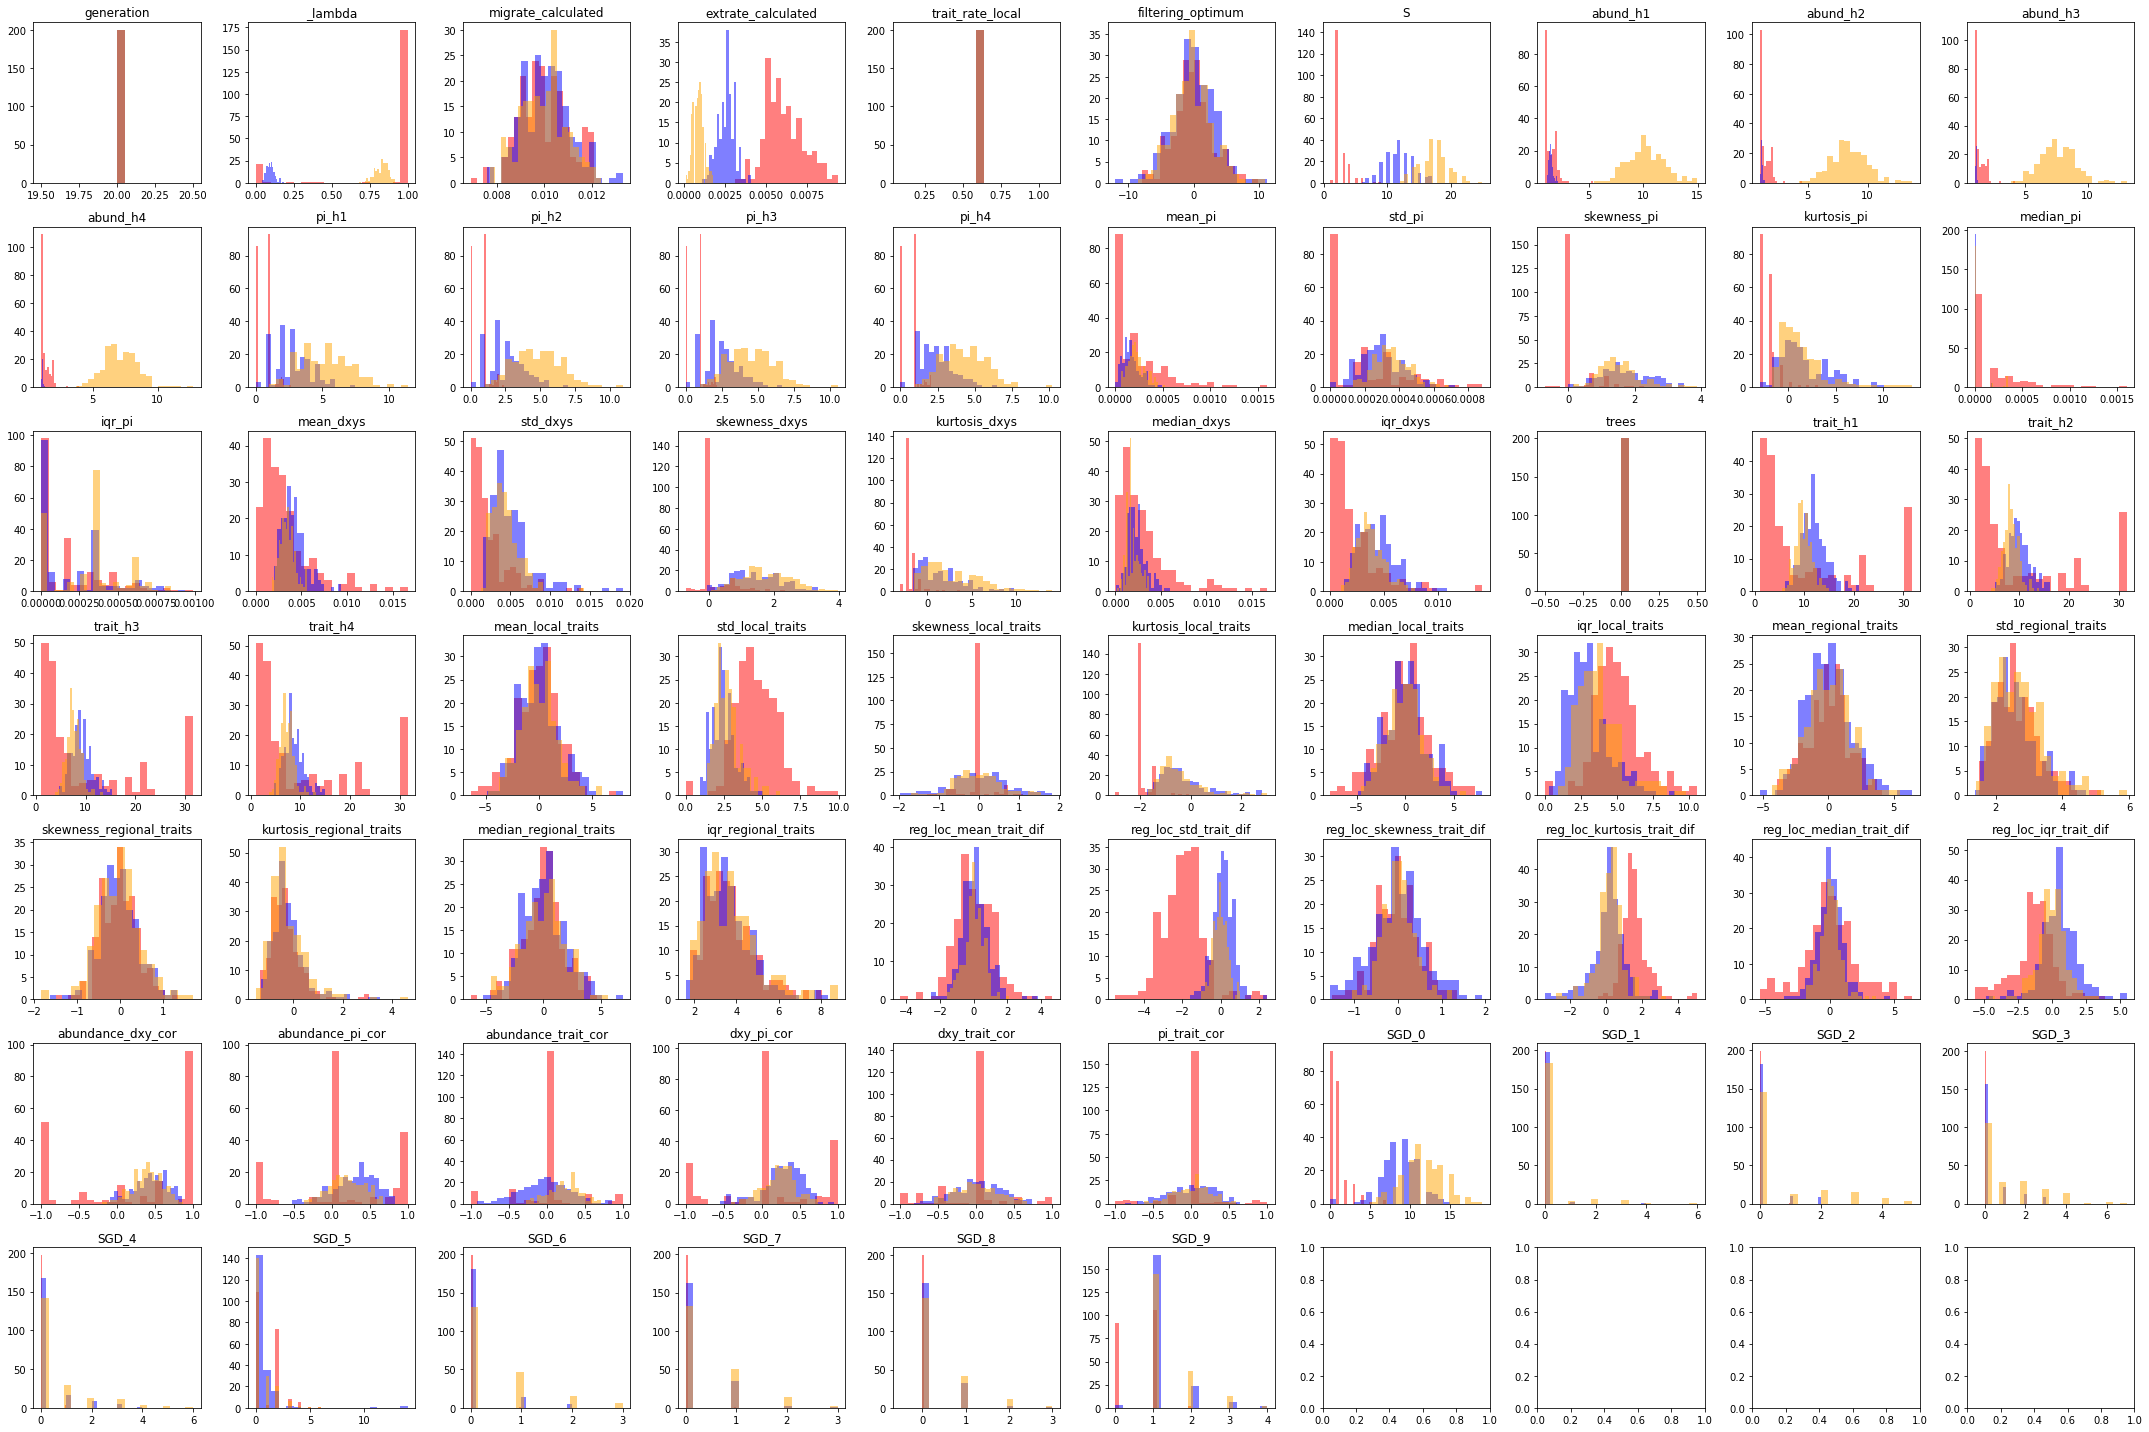

In [43]:
# This is annoying, so we can plot them in one giant figure
# neutral is green
# pairwise is orange
# Compare previous version of pw with new
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(cmp_mean_res0.columns)[15:], axs):
    ax.hist(cmp_mean[p], color='red',bins=20,alpha=0.5)
    ax.hist(cmp_neutral[p], color='blue', bins=20, alpha=0.5)
    ax.hist(cmp_pw[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()